<a href="https://colab.research.google.com/github/nanda1296/Predictive-Analytics-for-Real-Estate/blob/main/Project_Group_A13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Spring 2023 - AISC - Nest Analytics_Toronto_housing_data_.xlsx')
df.head()

,Unnamed: 0,Land Use,Property Address,Suite/ RESIDENTIAL CONDO#,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,RESIDENTIAL CONDO,1208 3RD AVE S,8,2013-01-24,132000,20130128-0008725,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SINGLE FAMILY,1802 STEWART PL,NaN,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,SINGLE FAMILY,224 PEACHTREE ST,NaN,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,SINGLE FAMILY,316 LUTIE ST,NaN,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [15]:
df = df.drop(df.columns[0],axis=1)
df.head()

,Land Use,Property Address,Suite/ RESIDENTIAL CONDO#,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,1208 3RD AVE S,8,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,1802 STEWART PL,NaN,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,2761 ROSEDALE PL,NaN,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,224 PEACHTREE ST,NaN,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,316 LUTIE ST,NaN,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [7]:
df.shape

(56636, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Land Use                           56636 non-null  object        
 1   Property Address                   56477 non-null  object        
 2   Suite/ RESIDENTIAL CONDO#          6109 non-null   object        
 3   Sale Date                          56636 non-null  datetime64[ns]
 4   Sale Price                         56636 non-null  int64         
 5   Legal Reference                    56636 non-null  object        
 6   Sold As Vacant                     56636 non-null  object        
 7   Multiple Parcels Involved in Sale  56636 non-null  object        
 8   Owner Name                         25261 non-null  object        
 9   Address                            26017 non-null  object        
 10  Acreage                           

In [9]:
df.isnull().sum().sort_values(ascending=False)

Suite/ RESIDENTIAL CONDO#            50527
Half Bath                            32490
Bedrooms                             32477
Foundation Type                      32472
Grade                                32471
Exterior Wall                        32471
Year Built                           32471
Finished Area                        32470
Full Bath                            32359
Owner Name                           31375
Land Value                           30619
Total Value                          30619
Building Value                       30619
Neighborhood                         30619
Tax District                         30619
Acreage                              30619
Address                              30619
Property Address                       159
Multiple Parcels Involved in Sale        0
Sold As Vacant                           0
Legal Reference                          0
Sale Price                               0
Sale Date                                0
Land Use   

#Data Exploration

<ipython-input-10-71efaa35b498>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Reds")


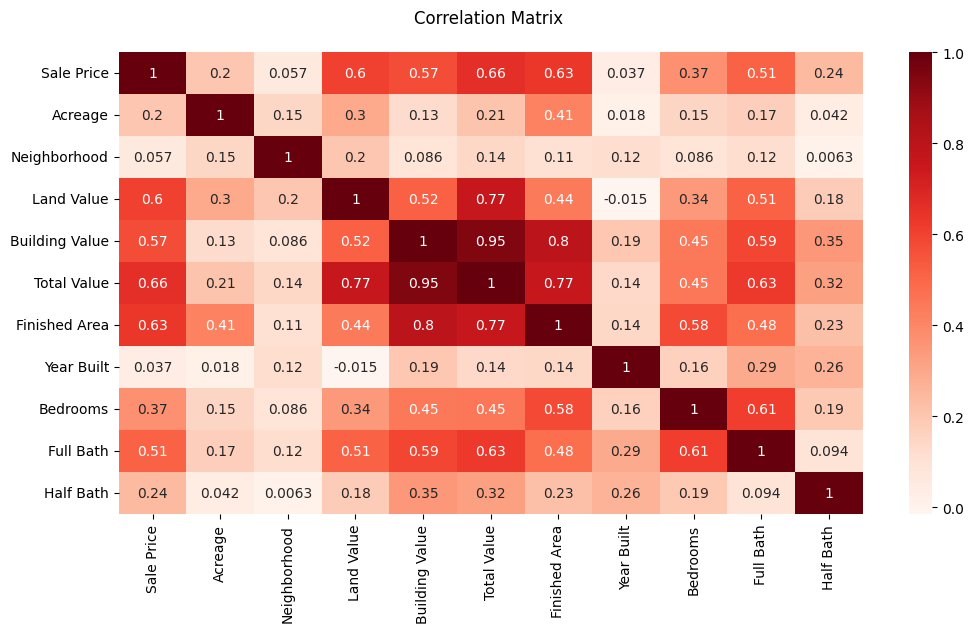

In [10]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.title('Correlation Matrix \n'.center(10))
plt.show()

In [16]:
df = df.drop(['Property Address','Suite/ RESIDENTIAL CONDO#','Sale Date','Legal Reference','Owner Name','Address','Foundation Type','Exterior Wall'], axis=1)
df.head()

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,132000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,191500,No,No,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,168300.0,1149.00000,1941.0,C,2.0,1.0,0.0
2,SINGLE FAMILY,202000,No,No,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,191800.0,2090.82495,2000.0,C,3.0,2.0,1.0
3,SINGLE FAMILY,32000,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,268700.0,2145.60001,1948.0,B,4.0,2.0,0.0
4,SINGLE FAMILY,102000,No,No,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,164800.0,1969.00000,1910.0,C,2.0,1.0,0.0


In [17]:
df = df.dropna(axis='rows')
df

,Land Use,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Grade,Bedrooms,Full Bath,Half Bath
1,SINGLE FAMILY,191500,No,No,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,168300.0,1149.00000,1941.0,C,2.0,1.0,0.0
2,SINGLE FAMILY,202000,No,No,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,191800.0,2090.82495,2000.0,C,3.0,2.0,1.0
3,SINGLE FAMILY,32000,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,268700.0,2145.60001,1948.0,B,4.0,2.0,0.0
4,SINGLE FAMILY,102000,No,No,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,164800.0,1969.00000,1910.0,C,2.0,1.0,0.0
5,SINGLE FAMILY,93736,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,86100.0,113300.0,1037.00000,1945.0,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,SINGLE FAMILY,214000,No,No,0.27,URBAN SERVICES DISTRICT,6328.0,25000.0,142400.0,167400.0,2421.00000,1996.0,C,3.0,3.0,0.0
56607,SINGLE FAMILY,236000,No,No,0.23,URBAN SERVICES DISTRICT,6328.0,25000.0,159300.0,184300.0,3117.00000,1995.0,C,3.0,3.0,0.0
56614,SINGLE FAMILY,466000,No,No,0.15,URBAN SERVICES DISTRICT,126.0,40000.0,204100.0,256000.0,1637.00000,2004.0,B,3.0,2.0,1.0
56615,SINGLE FAMILY,685000,No,No,0.19,URBAN SERVICES DISTRICT,126.0,40000.0,295900.0,351600.0,2478.00000,2005.0,B,4.0,3.0,1.0


The Datset consists of 16 features and 24012 records after removing the null values

In [18]:
#checking the data types of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24014 entries, 1 to 56616
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           24014 non-null  object 
 1   Sale Price                         24014 non-null  int64  
 2   Sold As Vacant                     24014 non-null  object 
 3   Multiple Parcels Involved in Sale  24014 non-null  object 
 4   Acreage                            24014 non-null  float64
 5   Tax District                       24014 non-null  object 
 6   Neighborhood                       24014 non-null  float64
 7   Land Value                         24014 non-null  float64
 8   Building Value                     24014 non-null  float64
 9   Total Value                        24014 non-null  float64
 10  Finished Area                      24014 non-null  float64
 11  Year Built                         24014 non-null  flo

In [19]:
#Checking for unique rows in each feature
df.nunique().sort_values()

Sold As Vacant                          2
Multiple Parcels Involved in Sale       2
Half Bath                               4
Tax District                            7
Full Bath                              11
Bedrooms                               12
Grade                                  17
Land Use                               25
Year Built                            126
Neighborhood                          190
Acreage                               427
Land Value                            937
Sale Price                           3770
Building Value                       4390
Total Value                          5616
Finished Area                        6091
dtype: int64

In [20]:
df.describe()

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,2.401400e+04,24014.000000,24014.000000,2.401400e+04,2.401400e+04,2.401400e+04,24014.000000,24014.000000,24014.000000,24014.000000,24014.00000
mean,2.749566e+05,0.454338,4424.216415,6.894913e+04,1.723069e+05,2.439108e+05,1915.046671,1963.660032,3.091072,1.892771,0.28550
std,3.031262e+05,0.789862,2138.148036,1.018895e+05,1.927372e+05,2.711823e+05,1103.644400,26.442416,0.851968,0.954399,0.48877
min,1.000000e+02,0.040000,107.000000,1.000000e+02,1.400000e+03,1.260000e+04,450.000000,1799.000000,0.000000,0.000000,0.00000
25%,1.250000e+05,0.190000,3130.000000,2.190000e+04,8.350000e+04,1.094000e+05,1236.000000,1948.000000,3.000000,1.000000,0.00000
50%,1.850000e+05,0.270000,4026.000000,2.990000e+04,1.171000e+05,1.542000e+05,1630.000000,1960.000000,3.000000,2.000000,0.00000
75%,3.249000e+05,0.450000,6229.000000,6.030000e+04,1.885000e+05,2.778000e+05,2211.000000,1983.000000,3.750000,2.000000,1.00000
max,1.075000e+07,47.500000,9530.000000,1.869000e+06,5.824300e+06,6.402600e+06,19728.249880,2017.000000,11.000000,10.000000,3.00000


In [21]:
df.isnull().sum()

Land Use                             0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Year Built                           0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

#Exploratory Data Analysis (EDA)

<ipython-input-22-1a8efd427738>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vis1 = sns.distplot(df['Sale Price'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][0])
<ipython-input-22-1a8efd427738>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vis2 = sns.distplot(df['Land V

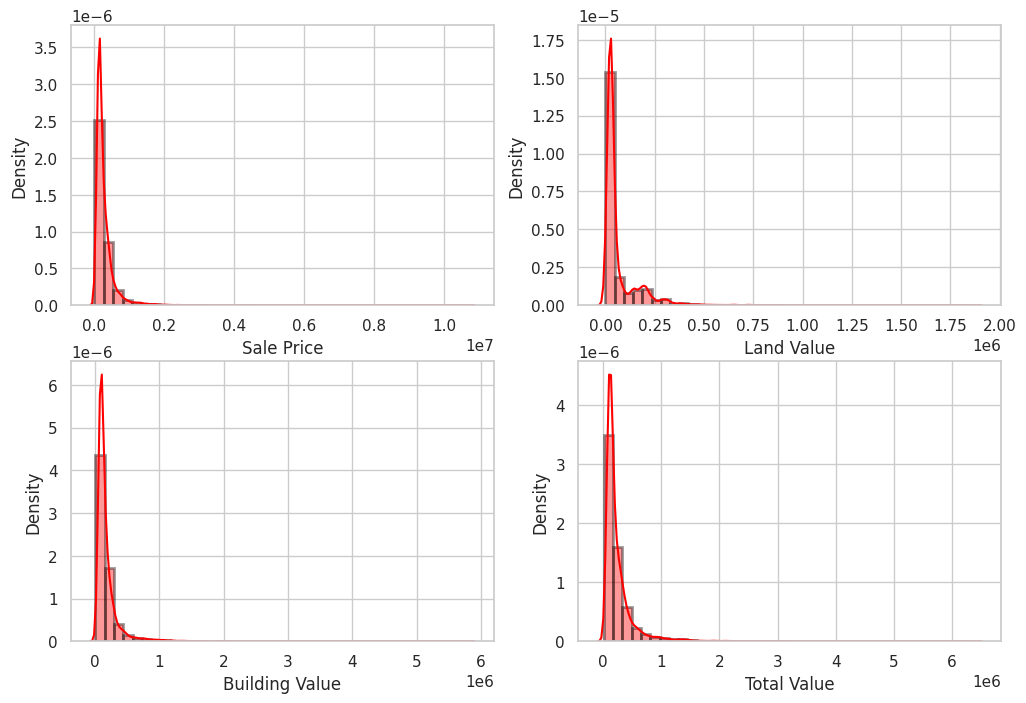

In [22]:
sns.set(style='whitegrid')
f, ax = plt.subplots(2,2,figsize = (12,8))

vis1 = sns.distplot(df['Sale Price'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][0])
vis2 = sns.distplot(df['Land Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[0][1])
vis3 = sns.distplot(df['Building Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[1][0])
vis4 = sns.distplot(df['Total Value'], bins=40, color='red', kde=True, hist_kws=dict(edgecolor='black', linewidth=2),ax= ax[1][1])

plt.show()

In [23]:
#skewness and kurtosis
print("Skewness of the Sale Price: ", df['Sale Price'].skew())
print("Kurtosis of the Sale Price: ", df['Sale Price'].kurt())

Skewness of the Sale Price:  6.485499370693319
Kurtosis of the Sale Price:  104.4372869779756


In [24]:
df['Land Use'].value_counts()

SINGLE FAMILY                             21285
DUPLEX                                     1184
ZERO LOT LINE                               845
VACANT RESIDENTIAL LAND                     473
TRIPLEX                                      76
RESIDENTIAL CONDO                            36
QUADPLEX                                     34
CHURCH                                       24
DORMITORY/BOARDING HOUSE                     14
SPLIT CLASS                                  13
PARSONAGE                                     5
GREENBELT                                     4
FOREST                                        3
MOBILE HOME                                   2
OFFICE BLDG (ONE OR TWO STORIES)              2
DAY CARE CENTER                               2
APARTMENT: LOW RISE (BUILT SINCE 1960)        2
TERMINAL/DISTRIBUTION WAREHOUSE               2
NON-PROFIT CHARITABLE SERVICE                 2
STRIP SHOPPING CENTER                         1
CONVENIENCE MARKET WITHOUT GAS          

In [25]:
df['Grade'].value_counts()

C       17174
B        3668
D        1966
A         596
X         523
E          60
TCC        14
IDC         3
AAC         2
OMB         1
OFC         1
SSC         1
TFC         1
SRD         1
SRC         1
TAC         1
OFB         1
Name: Grade, dtype: int64

In [26]:
col = list(df.columns)
categorical_features = []
numerical_features = []

for i in col:
        if df[i].dtype == 'object':
            categorical_features.append(i)
        else:
            numerical_features.append(i)

print('Categorical_Features: ', categorical_features)
print('Numerical_Features: ', numerical_features)

print('\nInference: The Dataset has {} categorical & {} numerical features.'.format(len(categorical_features),len(numerical_features)))

Categorical_Features:  ['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Tax District', 'Grade']
Numerical_Features:  ['Sale Price', 'Acreage', 'Neighborhood', 'Land Value', 'Building Value', 'Total Value', 'Finished Area', 'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath']

Inference: The Dataset has 5 categorical & 11 numerical features.


In [27]:
#One-hot encoding the categorical columns

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', min_frequency=200)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical_features]))
OH_cols.index = df.index
df2 = df.drop(categorical_features, axis=1)
df = pd.concat([df2, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
df.shape

(24014, 33)

In [29]:
df.columns

Index([    'Sale Price',        'Acreage',   'Neighborhood',     'Land Value',
       'Building Value',    'Total Value',  'Finished Area',     'Year Built',
             'Bedrooms',      'Full Bath',      'Half Bath',                0,
                      1,                2,                3,                4,
                      5,                6,                7,                8,
                      9,               10,               11,               12,
                     13,               14,               15,               16,
                     17,               18,               19,               20,
                     21],
      dtype='object')

In [36]:
target= 'Sale Price'
X = df.drop([target],axis=1)
y = df[target]

In [37]:
X.columns = X.columns.astype(str)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Original set --> ', X.shape,y.shape, '\nTraining set --> ', X_train.shape,y_train.shape, '\nTesting set  --> ', X_test.shape,y_test.shape)

Original set -->  (24014, 32) (24014,) 
Training set -->  (19211, 32) (19211,) 
Testing set  -->  (4803, 32) (4803,)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [40]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(['int','float']))
X_test_scaled = scaler.transform(X_test.select_dtypes(['int', 'float']))

In [41]:
#Linear Regression
model1 = LinearRegression()
lr = model1.fit(X_train_scaled, y_train)

In [44]:
#Support Vector Regression
model2 = SVR(kernel='rbf', C=1, epsilon=10)
svr = model2.fit(X_train_scaled, y_train)

In [42]:
lr.score(X_train_scaled, y_train)

0.7062678125939099

In [43]:
lr.score(X_test_scaled, y_test)

0.7423803307824849

In [45]:
svr.score(X_train_scaled, y_train)

-0.08442909741611526

In [46]:
svr.score(X_test_scaled, y_test)

-0.08861462650985352